In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
x=np.random.uniform(0,1,1000)
y=np.random.uniform(0,1,1000)

In [ ]:
df=pd.DataFrame(columns=["X","Y"])
df

In [ ]:
df.X=x
df.Y=y
df.head()

<Axes: xlabel='X', ylabel='Y'>

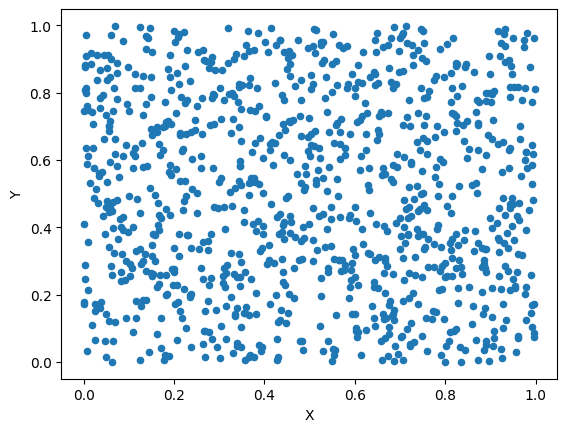

In [ ]:
df.plot(x="X",y="Y",kind="scatter")

<Axes: xlabel='X', ylabel='Y'>

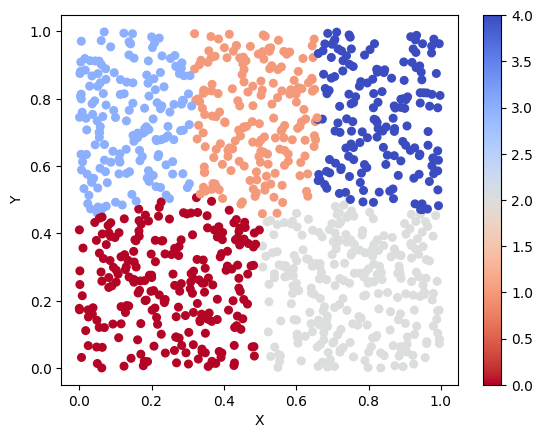

In [ ]:
model1=KMeans(n_clusters=5).fit(df)
df.plot(x="X",y="Y",c=model1.labels_,kind="scatter",s=30,cmap=plt.cm.coolwarm_r)

In [ ]:
data=pd.read_csv("Universities.csv")
data.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
data_norm=norm_func(data.iloc[:,1:])

In [ ]:
data_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [ ]:
model=KMeans(n_clusters=10).fit(data_norm)
model.inertia_

0.8513371428253952

<function matplotlib.pyplot.show(close=None, block=None)>

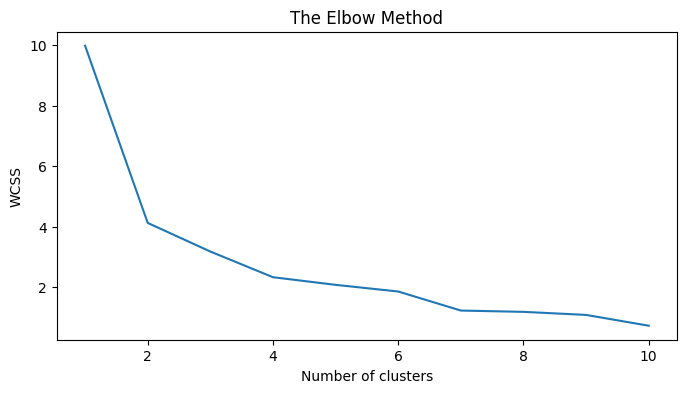

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(8,4))
WCSS=[]
for i in range(1,11):
  model=KMeans(n_clusters=i).fit(data_norm)
  WCSS.append(model.inertia_)
plt.plot(range(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show

In [ ]:
clf=KMeans(n_clusters=5)
clf.fit(data_norm)


KMeans(n_clusters=5)

In [ ]:
y_names=clf.predict(data_norm)

In [ ]:
y_names

array([2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 0, 3, 2, 1, 2, 1, 0, 4, 0, 4,
       0, 3, 2], dtype=int32)

In [ ]:
clf.cluster_centers_

array([[0.53658537, 0.71527778, 0.45394737, 0.47368421, 0.11055476,
        0.675     ],
       [0.08536585, 0.14583333, 0.84868421, 0.84210526, 0.00329865,
        0.03333333],
       [0.87398374, 0.8904321 , 0.10380117, 0.22807018, 0.51893228,
        0.86666667],
       [0.1902439 , 0.15277778, 0.625     , 0.55263158, 0.04222631,
        0.28333333],
       [0.6722561 , 0.67013889, 0.32401316, 0.26315789, 0.41362924,
        0.6625    ]])

In [ ]:
clf.labels_

array([2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 0, 3, 2, 1, 2, 1, 0, 4, 0, 4,
       0, 3, 2], dtype=int32)

In [ ]:
clf.inertia_   ####WCSS distances for k=5

2.4387156345109986

In [ ]:
md=pd.Series(y_names)
data_norm['clust']=md
data_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,2
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,2
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,4
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,4
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,4
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,2
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,2
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,4
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,2
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,4


In [ ]:
md=pd.Series(y_names)
data['clust']=md
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,4
4,Cornell,1280,83,33,13,21864,90,4
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,4
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,4


In [ ]:
data_norm.iloc[:,1:].groupby(data_norm.clust).mean()

,Top10,Accept,SFRatio,Expenses,GradRate,clust
clust,,,,,,
0,0.715278,0.453947,0.473684,0.110555,0.675000,0.0
1,0.145833,0.848684,0.842105,0.003299,0.033333,1.0
2,0.890432,0.103801,0.228070,0.518932,0.866667,2.0
3,0.152778,0.625000,0.552632,0.042226,0.283333,3.0
4,0.670139,0.324013,0.263158,0.413629,0.662500,4.0


In [ ]:
plt.style.use('classic')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: xlabel='Expenses', ylabel='SFRatio'>

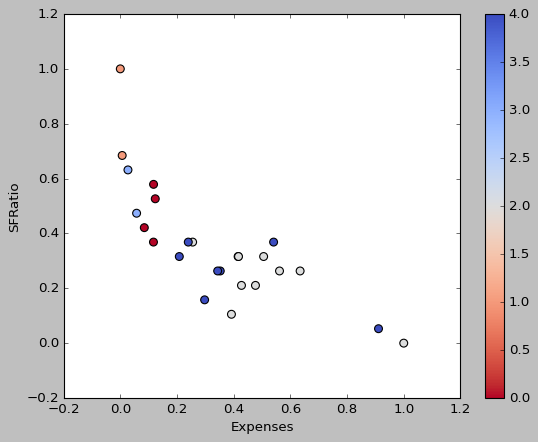

In [ ]:
data_norm.plot("Expenses","SFRatio",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [ ]:
WCSS

In [ ]:
data['clust']=md
data